In [65]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
df = pd.read_csv("Amazon Customer Reviews.csv")

In [68]:
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [69]:
df.isnull().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName                True
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                    True
Text                      False
dtype: bool

In [70]:
df.dropna(subset=['ProfileName', 'Summary'], inplace=True)

In [71]:
df.duplicated().sum()

0

In [72]:
del df['Id']
del df['ProductId']
del df['UserId']
del df['ProfileName']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']
del df['Time']
del df['Summary']

In [73]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [74]:
# df['text'] = df['Text'] + ' ' + df['Summary']
# del df['Text']
# del df['Summary']

In [75]:
df['Score'] = df['Score'].astype(int)

In [76]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

In [77]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [78]:
def tokenize_text(text):
    # Tokenize using NLTK's word_tokenize
    tokens = word_tokenize(text)
    return tokens

In [79]:
# Apply tokenization
df['tokens'] = df['cleaned_text'].apply(tokenize_text)


In [80]:
# Display a sample of tokenized data
print(df[['cleaned_text', 'tokens']].head())

                                        cleaned_text  \
0  i have bought several of the vitality canned d...   
1  product arrived labeled as jumbo salted peanut...   
2  this is a confection that has been around a fe...   
3  if you are looking for the secret ingredient i...   
4  great taffy at a great price  there was a wide...   

                                              tokens  
0  [i, have, bought, several, of, the, vitality, ...  
1  [product, arrived, labeled, as, jumbo, salted,...  
2  [this, is, a, confection, that, has, been, aro...  
3  [if, you, are, looking, for, the, secret, ingr...  
4  [great, taffy, at, a, great, price, there, was...  


In [81]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens_no_stopwords'] = df['tokens'].apply(remove_stopwords)

In [82]:
stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(stem_tokens)

In [83]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [84]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [85]:
# Apply sentiment analysis and add as a new column
df["Polarity_score"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)['compound'])

In [86]:
# Optionally, classify the sentiment based on score
df["sentiment_label"] = df["Polarity_score"].apply(
    lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral"
)

In [87]:
print(df[['Score', 'Polarity_score', 'sentiment_label']])

        Score  Polarity_score sentiment_label
0           5          0.9441        Positive
1           1         -0.5664        Negative
2           4          0.8265        Positive
3           2          0.4404        Positive
4           5          0.9468        Positive
...       ...             ...             ...
568449      5          0.8589        Positive
568450      2         -0.7812        Negative
568451      5          0.4352        Positive
568452      5          0.9678        Positive
568453      5          0.4754        Positive

[568401 rows x 3 columns]


# comparison between the generated sentiment labels and the original ones

In [88]:
def categorize_rating(star):
    if star >= 4:
        return 'Positive'
    elif star == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['original_sentiment'] = df['Score'].apply(categorize_rating)

In [89]:
print(df[['Score','original_sentiment', 'sentiment_label']])

        Score original_sentiment sentiment_label
0           5           Positive        Positive
1           1           Negative        Negative
2           4           Positive        Positive
3           2           Negative        Positive
4           5           Positive        Positive
...       ...                ...             ...
568449      5           Positive        Positive
568450      2           Negative        Negative
568451      5           Positive        Positive
568452      5           Positive        Positive
568453      5           Positive        Positive

[568401 rows x 3 columns]


In [90]:
df['Mismatch'] = df['original_sentiment'] != df['sentiment_label']

In [91]:
print(df[['Mismatch']])

        Mismatch
0          False
1          False
2          False
3           True
4          False
...          ...
568449     False
568450     False
568451     False
568452     False
568453     False

[568401 rows x 1 columns]


In [92]:
comparison = df['Mismatch'].value_counts()

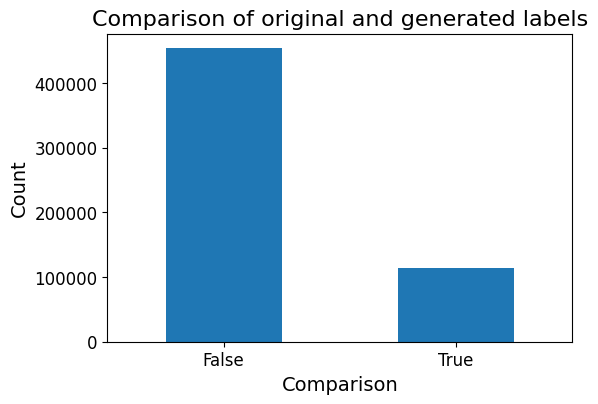

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
comparison.plot(kind='bar')  

plt.title('Comparison of original and generated labels', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [94]:
# Count the number of False values in 'Sentiment_Error' column
false_count = (df['Mismatch'] == True).sum()

print(f'Number of False values: {false_count}')

Number of False values: 114502


In [95]:
# Calculate accuracy based on the number of False values (correct sentiment labels)
accuracy = (df['Mismatch'] == False).mean()

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.86%


# comparison between the generated stars and the original ones

In [96]:
def polarity_to_label(polarity):
    if polarity > 0:
        return 5 # Positive
    elif polarity < 0:
        return 1  # Negative
    else:
        return 3  # Neutral


df['generated_Score'] = df['Polarity_score'].apply(polarity_to_label)

In [97]:
def score_to_label(score):
    if score <= 2:
        return 1  # Negative
    elif score == 3:
        return 3 # Neutral
    else:
        return 5 # Positive

df['original_Score'] = df['Score'].apply(score_to_label)

In [98]:
df.columns

Index(['Score', 'Text', 'cleaned_text', 'tokens', 'tokens_no_stopwords',
       'stemmed_tokens', 'Polarity_score', 'sentiment_label',
       'original_sentiment', 'Mismatch', 'generated_Score', 'original_Score'],
      dtype='object')

In [99]:
print(df[['original_Score', 'original_sentiment', 'sentiment_label', 'generated_Score']])

        original_Score original_sentiment sentiment_label  generated_Score
0                    5           Positive        Positive                5
1                    1           Negative        Negative                1
2                    5           Positive        Positive                5
3                    1           Negative        Positive                5
4                    5           Positive        Positive                5
...                ...                ...             ...              ...
568449               5           Positive        Positive                5
568450               1           Negative        Negative                1
568451               5           Positive        Positive                5
568452               5           Positive        Positive                5
568453               5           Positive        Positive                5

[568401 rows x 4 columns]


In [100]:
df['original_Score'].value_counts()

original_Score
5    443756
1     82007
3     42638
Name: count, dtype: int64

In [101]:
original_score = df['original_Score'].value_counts()

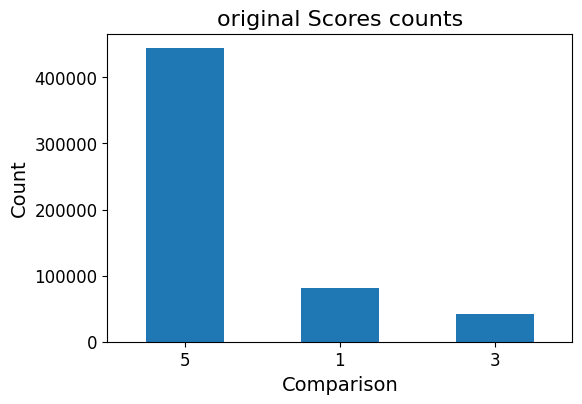

In [102]:
plt.figure(figsize=(6, 4))  
original_score.plot(kind='bar')  

plt.title('original Scores counts', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [103]:
df['generated_Score'].value_counts()

generated_Score
5    497671
1     63108
3      7622
Name: count, dtype: int64

In [104]:
generated_score = df['generated_Score'].value_counts()

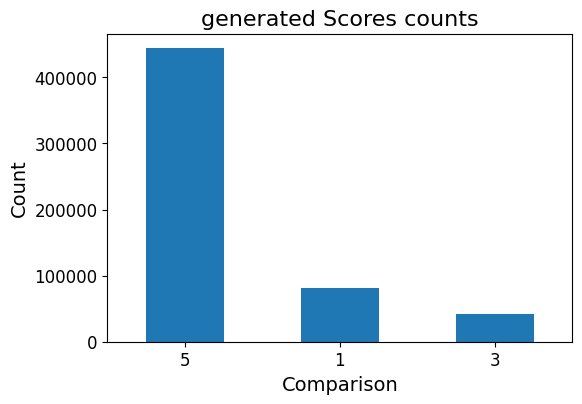

In [105]:
plt.figure(figsize=(6, 4))  
original_score.plot(kind='bar')  

plt.title('generated Scores counts', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [106]:
# Calculate the accuracy of the generated stars compared to the original stars
correct_predictions = (df['original_Score'] == df['generated_Score']).sum()
total_predictions = len(df)

accuracy = correct_predictions / total_predictions * 100

# Display the results
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.86%


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['generated_Score'], test_size=0.2, random_state=42)

In [109]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [110]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [111]:
y_pred = model.predict(X_test_tfidf)

In [112]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

acc=accuracy_score(y_test,y_pred)
print(acc)

0.9240594294561096


In [113]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.56      0.64     12800
           3       0.89      0.40      0.55      1563
           5       0.94      0.98      0.96     99318

    accuracy                           0.92    113681
   macro avg       0.87      0.64      0.72    113681
weighted avg       0.92      0.92      0.92    113681



In [114]:
# # اختر جملة من بيانات الداتا سيت بناءً على إدخال المستخدم
# user_input_index = int(input("أدخل رقم الجملة (index) الذي تريد تحليله من الداتا سيت: "))

# # التحقق من صحة الإدخال
# if user_input_index < 0 or user_input_index >= len(df):
#     print("رقم الجملة خارج النطاق. الرجاء إدخال رقم صحيح.")
# else:
#     # استخراج الجملة الأصلية
#     original_text = df.iloc[user_input_index]['cleaned_text']

#     # استخراج النجوم الأصلية
#     original_score = df.iloc[user_input_index]['Score']

#     # استخراج المشاعر الأصلية
#     original_sentiment = df.iloc[user_input_index]['original_sentiment']

#     # توقع النجوم بناءً على المشاعر المحسوبة
#     polarity_score = sia.polarity_scores(original_text)['compound']
#     predicted_stars = polarity_to_label(polarity_score)

#     # التنبؤ بالمشاعر بناءً على الجملة
#     predicted_sentiment = "Positive" if polarity_score > 0 else "Negative" if polarity_score < 0 else "Neutral"

#     # عرض النتائج
#     print("\nنتائج التحليل:")
#     print(f"النص: {original_text}")
#     print(f"النجوم الأصلية: {original_score}")
#     print(f"المشاعر الأصلية: {original_sentiment}")
#     print(f"النجوم المتوقعة: {predicted_stars}")
#     print(f"المشاعر المتوقعة: {predicted_sentiment}")

#     # مقارنة النجوم والمشاعر
#     stars_match = "تطابق" if original_score == predicted_stars else "عدم تطابق"
#     sentiment_match = "تطابق" if original_sentiment == predicted_sentiment else "عدم تطابق"

#     print("\nمقارنة النتائج:")
#     print(f"تطابق النجوم: {stars_match}")
#     print(f"تطابق المشاعر: {sentiment_match}")

#     # التحقق من التطابق الكلي
#     if stars_match == "تطابق" and sentiment_match == "تطابق":
#         print("\nالتوقع يتطابق تمامًا مع البيانات الأصلية.")
#     else:
#         print("\nهناك اختلاف بين التوقعات والبيانات الأصلية.")


In [118]:
df['original_Score']

0         5
1         1
2         5
3         1
4         5
         ..
568449    5
568450    1
568451    5
568452    5
568453    5
Name: original_Score, Length: 568401, dtype: int64

In [122]:
# Select a sentence from the dataset based on user input
user_input_index = int(input("Enter the sentence index you want to analyze from the dataset: "))

# Validate the input
if user_input_index < 0 or user_input_index >= len(df):
    print("Index out of range. Please enter a valid index.")
else:
    # Extract the original text
    original_text = df.iloc[user_input_index]['cleaned_text']

    # Extract the original score
    original_score = df.iloc[user_input_index]['Score']

    # Extract the original sentiment
    original_sentiment = df.iloc[user_input_index]['original_sentiment']

    # Predict stars based on calculated sentiment
    polarity_score = sia.polarity_scores(original_text)['compound']
    predicted_stars = polarity_to_label(polarity_score)

    # Predict sentiment based on the sentence
    predicted_sentiment = "Positive" if polarity_score > 0 else "Negative" if polarity_score < 0 else "Neutral"

    # Display the results
    print("\nAnalysis Results:")
    print(f"Text: {original_text}")
    print(f"Original Stars: {original_score}")
    print(f"Original Sentiment: {original_sentiment}")
    print(f"Predicted Stars: {predicted_stars}")
    print(f"Predicted Sentiment: {predicted_sentiment}")

    # Compare stars and sentiment
    stars_match = "Match" if original_score == predicted_stars else "Mismatch"
    sentiment_match = "Match" if original_sentiment == predicted_sentiment else "Mismatch"

    print("\nComparison Results:")
    print(f"Stars Match: {stars_match}")
    print(f"Sentiment Match: {sentiment_match}")

    # Check overall match
    if stars_match == "Match" and sentiment_match == "Match":
        print("\nThe prediction matches perfectly with the original data.")
    else:
        print("\nThere is a discrepancy between the predictions and the original data.")


Analysis Results:
Text: this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar  and it is a tiny mouthful of heaven  not too chewy and very flavorful  i highly recommend this yummy treat  if you are familiar with the story of cs lewis the lion the witch and the wardrobe  this is the treat that seduces edmund into selling out his brother and sisters to the witch
Original Stars: 4
Original Sentiment: Positive
Predicted Stars: 5
Predicted Sentiment: Positive

Comparison Results:
Stars Match: Mismatch
Sentiment Match: Match

There is a discrepancy between the predictions and the original data.


In [116]:
df.head()

,Score,Text,cleaned_text,tokens,tokens_no_stopwords,stemmed_tokens,Polarity_score,sentiment_label,original_sentiment,Mismatch,generated_Score,original_Score
0,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product...",0.9441,Positive,Positive,False,5,5
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanutsth...",-0.5664,Negative,Negative,False,1,1
2,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confect, around, centuri, light, pillowi, cit...",0.8265,Positive,Positive,False,5,5
3,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo...",0.4404,Positive,Negative,True,5,1
4,5,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffi, great, price, wide, assort, yum...",0.9468,Positive,Positive,False,5,5


In [123]:
# Select a sentence from the dataset based on user input
user_input_index = int(input("Enter the sentence index you want to analyze from the dataset: "))

# Validate the input
if user_input_index < 0 or user_input_index >= len(df):
    print("Index out of range. Please enter a valid index.")
else:
    # Extract the original text
    original_text = df.iloc[user_input_index]['cleaned_text']

    # Extract the original score from original_Score column
    original_score = df.iloc[user_input_index]['original_Score']

    # Extract the original sentiment
    original_sentiment = df.iloc[user_input_index]['original_sentiment']

    # Predict stars based on calculated sentiment
    polarity_score = sia.polarity_scores(original_text)['compound']
    predicted_stars = polarity_to_label(polarity_score)

    # Predict sentiment based on the sentence
    predicted_sentiment = "Positive" if polarity_score > 0 else "Negative" if polarity_score < 0 else "Neutral"

    # Display the results
    print("\nAnalysis Results:")
    print(f"Text: {original_text}")
    print(f"Original Stars: {original_score}")
    print(f"Original Sentiment: {original_sentiment}")
    print(f"Predicted Stars: {predicted_stars}")
    print(f"Predicted Sentiment: {predicted_sentiment}")

    # Compare stars and sentiment
    stars_match = "Match" if original_score == predicted_stars else "Mismatch"
    sentiment_match = "Match" if original_sentiment == predicted_sentiment else "Mismatch"

    print("\nComparison Results:")
    print(f"Stars Match: {stars_match}")
    print(f"Sentiment Match: {sentiment_match}")

    # Check overall match
    if stars_match == "Match" and sentiment_match == "Match":
        print("\nThe prediction matches perfectly with the original data.")
    else:
        print("\nThere is a discrepancy between the predictions and the original data.")



Analysis Results:
Text: this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar  and it is a tiny mouthful of heaven  not too chewy and very flavorful  i highly recommend this yummy treat  if you are familiar with the story of cs lewis the lion the witch and the wardrobe  this is the treat that seduces edmund into selling out his brother and sisters to the witch
Original Stars: 5
Original Sentiment: Positive
Predicted Stars: 5
Predicted Sentiment: Positive

Comparison Results:
Stars Match: Match
Sentiment Match: Match

The prediction matches perfectly with the original data.
